

## 🔁 Cloning the LGTA Repository

This step downloads the official **Latent Generative Transformer Augmentation (LGTA)** GitHub repository directly into the notebook environment. After cloning, we move into the main project directory so that all LGTA modules, models, and utilities can be imported and used seamlessly throughout the workflow.



In [ ]:
!git clone https://github.com/luisroque/latent-generative-modeling-time-series-augmentation.git
%cd latent-generative-modeling-time-series-augmentation/lgta


fatal: destination path 'latent-generative-modeling-time-series-augmentation' already exists and is not an empty directory.
/content/latent-generative-modeling-time-series-augmentation/lgta



###Display LGTA Repository Structure


- Imports the `os` module and uses `os.walk('.')` to recursively go through all folders and files starting from the current LGTA project directory.  
- Filters out hidden directories and `__pycache__` so they are not included in the traversal or output.  
- Computes a depth level for each folder and builds indentation strings so directories are printed in a tree-like, hierarchical view.  
- For each directory, prints its name and then up to 10 visible files inside it, each further indented; if there are more than 10 files, prints a summary line showing how many additional files are not listed.


In [ ]:
#Step 1.2: Display repository structure
import os
for root, dirs, files in os.walk('.'):
    # Skip hidden directories and __pycache__
    dirs[:] = [d for d in dirs if not d.startswith('.') and d != '__pycache__']
    level = root.replace('.', '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files[:10]:  # Limit files shown
        if not file.startswith('.'):
            print(f'{subindent}{file}')
    if len(files) > 10:
        print(f'{subindent}... and {len(files) - 10} more files')


./
  __init__.py
  mitbih_100_104 (1).zip
  e2e/
    __init__.py
    e2e_processing.py
  feature_engineering/
    dynamic_features.py
    __init__.py
    static_features.py
    feature_transformations.py
    get_data_distance.py
  preprocessing/
    pre_processing_datasets.py
    __init__.py
    subsample_dataset.py
    utils.py
  transformations/
    compute_similarities_summary_metrics.py
    __init__.py
    apply_transformations_benchmark.py
    compute_distances.py
    compute_similarities.py
    manipulate_data.py
    create_dataset_versions.py
    utils.py
    similarity_model.py
  model/
    generate_data.py
    __init__.py
    helper.py
    create_dataset_versions_vae.py
    hyperparameter_tuning.py
    models.py
  experiments/
    __init__.py
    testing_downstream_task.py
    testing_benchmark_vs_lgta.py
  benchmarks/
    __init__.py
    timegan.py
  data/
  {'experiment_name': 'mitbih_cvae_small', 'paths': {'X_train': '/
    content/
      mit_bih_data/
        splits/
     



###Installing Required Dependencies

This script prepares the environment by installing all necessary libraries for running the LGTA framework:

* **Upgrades pip** to ensure compatibility with newer packages.
* Installs **PyTorch with CUDA support**, enabling faster GPU-accelerated training.
* Installs common scientific libraries such as **NumPy, Pandas, SciPy, scikit-learn, Matplotlib, Seaborn**, and utilities like **PyYAML** and **configparser**.
* If a `requirements.txt` file exists in the repository, it installs all dependencies from it; otherwise, it installs common time-series modeling packages including **TensorFlow**, **Keras**, and **statsmodels**.
* Finishes by confirming successful installation.




In [ ]:
# Step 1.3: Upgrade pip and install PyTorch (with CUDA support for faster training)
!pip install --upgrade pip
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# Step 1.4: Install other essential libraries
!pip install numpy pandas scikit-learn scipy matplotlib seaborn jupyter
!pip install pyyaml configparser

# Step 1.5: If requirements.txt exists, install from it
import os
if os.path.exists('requirements.txt'):
    !pip install -r requirements.txt
else:
    print("requirements.txt not found, installing common time-series dependencies...")
    !pip install tensorflow==2.13 keras statsmodels waveform-pytorch

print("\n✅ Installation complete!")


Looking in indexes: https://download.pytorch.org/whl/cu118
requirements.txt not found, installing common time-series dependencies...
ERROR: Could not find a version that satisfies the requirement tensorflow==2.13 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.13

✅ Installation complete!


###  Downloading MIT-BIH Arrhythmia Data with *wfdb*

This script installs the **wfdb** library and downloads a subset of records from the **MIT-BIH Arrhythmia Database** hosted on PhysioNet.

* Installs the `wfdb` package, which is used for reading ECG waveforms and annotations.
* Creates a local directory to store the downloaded data.
* Iterates through a list of record IDs (100–109) and downloads each ECG recording using `wfdb.rdrecord`.
* Stores successfully downloaded records in a list and prints a summary of how many were retrieved.

This prepares a local, accessible subset of MIT-BIH ECG data for further preprocessing and model training.


In [ ]:
#  Install wfdb (for reading PhysioNet data)
!pip install wfdb

#  Download MIT-BIH dataset
import wfdb
import os
import numpy as np

# Create dataset directory
dataset_dir = '/content/mit_bih_data'
os.makedirs(dataset_dir, exist_ok=True)

print("Downloading MIT-BIH Arrhythmia Database...")
# Download a subset of recordings (e.g., first 10 records)
record_names = [f'{i:03d}' for i in range(100, 110)]  # Records 100-109
downloaded_records = []

for record_name in record_names:
    try:
        record = wfdb.rdrecord(f'mit-bih-arrhythmia/{record_name}',
                               pn_dir='physionet.org/files/mitdb/1.0.0/')
        downloaded_records.append((record_name, record))
        print(f"✓ Downloaded record {record_name}")
    except Exception as e:
        print(f"✗ Failed to download {record_name}: {str(e)}")

print(f"\n✅ Downloaded {len(downloaded_records)} records successfully!")


### 💻 CODE CELL - Preprocess ECG Data


✗ Failed to download 100: 404 Error: Not Found for url: https://physionet.org/files/physionet.org/files/mitdb/1.0.0/100.hea
✗ Failed to download 101: 404 Error: Not Found for url: https://physionet.org/files/physionet.org/files/mitdb/1.0.0/101.hea
✗ Failed to download 102: 404 Error: Not Found for url: https://physionet.org/files/physionet.org/files/mitdb/1.0.0/102.hea
✗ Failed to download 103: 404 Error: Not Found for url: https://physionet.org/files/physionet.org/files/mitdb/1.0.0/103.hea
✗ Failed to download 104: 404 Error: Not Found for url: https://physionet.org/files/physionet.org/files/mitdb/1.0.0/104.hea
✗ Failed to download 105: 404 Error: Not Found for url: https://physionet.org/files/physionet.org/files/mitdb/1.0.0/105.hea
✗ Failed to download 106: 404 Error: Not Found for url: https://physionet.org/files/physionet.org/files/mitdb/1.0.0/106.hea
✗ Failed to download 107: 404 Error: Not Found for url: https://physionet.org/files/physionet.org/files/mitdb/1.0.0/107.hea
✗ Failed

### Uploading and Extracting MIT-BIH ZIP Data into Colab

This cell lets you manually upload your own **ZIP file containing MIT-BIH ECG records** and automatically extracts it into your dataset directory.

* Prompts you to upload a ZIP file using `files.upload()`.
* Creates (or reuses) the folder `/content/mit_bih_data`.
* Unzips all files—such as `.dat`, `.hea`, and `.atr`—into that folder.
* Prints a quick preview of the extracted directory contents.

Use this when you want to work with **locally downloaded MIT-BIH files** instead of downloading from PhysioNet inside Colab.


In [ ]:
from google.colab import files
import zipfile, os

# 1) Upload your ZIP (contains records 100–105)
uploaded = files.upload()
zip_name = list(uploaded.keys())[0]
print("Uploaded:", zip_name)

# 2) Unzip into the already existing mit_bih_data folder
data_root = "/content/mit_bih_data"
os.makedirs(data_root, exist_ok=True)

with zipfile.ZipFile(zip_name, 'r') as z:
    z.extractall(data_root)

print("Unzipped to:", data_root)
for root, dirs, files in os.walk(data_root):
    print(root, "->", files[:5])
    break


###  Loading Local MIT-BIH ECG Records with WFDB

This cell loads ECG recordings from the files you previously extracted into `/content/mit_bih_data`.

* It defines a list of record IDs (e.g., `"100"`, `"101"`, `"102"`).
* For each ID, WFDB automatically reads the corresponding `.dat` and `.hea` files.
* Each loaded record is stored in `downloaded_records`.
* Prints the signal shape for verification and the total number of loaded recordings.

Use this step to confirm your MIT-BIH data is correctly extracted and readable before preprocessing.


In [ ]:
import wfdb, os

data_root = "/content/mit_bih_data"  # contains 100.dat, 100.hea, etc.
record_ids = ["100","101","102"]
downloaded_records = []

for rec in record_ids:
    rec_path = os.path.join(data_root, rec)  # base path
    # wfdb will append .dat/.hea automatically
    record = wfdb.rdrecord(rec_path)
    downloaded_records.append((rec, record))
    print("Loaded", rec, "shape:", record.p_signal.shape)

print("Total loaded:", len(downloaded_records))


Loaded 100 shape: (650000, 2)
Loaded 101 shape: (650000, 2)
Loaded 102 shape: (650000, 2)
Total loaded: 3


### Extracting and Preparing Fixed-Length ECG Segments

This cell converts raw MIT-BIH ECG signals into normalized, fixed-length segments suitable for model training.

* Uses the loaded WFDB records and selects the first ECG channel.
* Normalizes each signal (z-score).
* Slices overlapping segments of length **256 samples**, spaced by **128 samples**.
* Limits the number of segments per record (e.g., 10 each).
* Stores segments in `X_data` and their corresponding record IDs in `y_data`.
* Saves the processed arrays to disk for later use.

This step produces a clean, uniformly shaped dataset ready for feeding into deep learning models.


In [ ]:
#  Extract signal segments and prepare data
import numpy as np
import pandas as pd

# Configuration
SEGMENT_LENGTH = 256  # ECG segment length (time steps)
SAMPLING_RATE = 250   # MIT-BIH sampling rate in Hz
NUM_SAMPLES_PER_RECORD = 10  # Samples per record

# Storage for processed data
X_data = []
y_data = []

print("Processing ECG signals into fixed-length segments...")

for record_name, record in downloaded_records:
    # Get the signal (first channel if multivariate)
    signal = record.p_signal[:, 0]

    # Normalize signal
    signal_mean = np.mean(signal)
    signal_std = np.std(signal)
    signal_normalized = (signal - signal_mean) / (signal_std + 1e-8)

    # Extract fixed-length segments
    num_segments = (len(signal_normalized) - SEGMENT_LENGTH) // (SEGMENT_LENGTH // 2)

    for i in range(min(NUM_SAMPLES_PER_RECORD, num_segments)):
        start_idx = i * (SEGMENT_LENGTH // 2)
        end_idx = start_idx + SEGMENT_LENGTH
        segment = signal_normalized[start_idx:end_idx]

        if len(segment) == SEGMENT_LENGTH:
            X_data.append(segment)
            y_data.append(record_name)

X_data = np.array(X_data)
y_data = np.array(y_data)

print(f"✅ Extracted {X_data.shape[0]} segments")
print(f"   Shape: {X_data.shape}")
print(f"   Data type: {X_data.dtype}")

# Save preprocessed data
np.save(f'{dataset_dir}/X_ecg_segments.npy', X_data)
np.save(f'{dataset_dir}/y_ecg_labels.npy', y_data)
print(f"💾 Saved preprocessed data to {dataset_dir}/")


Processing ECG signals into fixed-length segments...
✅ Extracted 30 segments
   Shape: (30, 256)
   Data type: float64
💾 Saved preprocessed data to /content/mit_bih_data/


### Splitting the ECG Dataset for Training, Validation, and Testing

This code loads the preprocessed ECG segments and divides them into training, validation, and test sets.

* Loads the saved ECG segments (`X_data`) and their record labels (`y_data`).
* Performs a **stratified train-test split**, ensuring each patient record is proportionally represented.
* Further splits the training set into **train** and **validation** subsets.
* Saves all resulting splits to disk for consistent reuse.

This ensures clean, well-balanced data preparation before training the model.


In [ ]:
# Step 3.1: Import and split data
from sklearn.model_selection import train_test_split
import numpy as np

# Load preprocessed data
X_data = np.load(f'{dataset_dir}/X_ecg_segments.npy')
y_data = np.load(f'{dataset_dir}/y_ecg_labels.npy')

print(f"Total samples: {len(X_data)}")
print(f"Unique patient records: {len(np.unique(y_data))}")

# Step 3.2: Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data,
    test_size=0.2,
    random_state=42,
    stratify=y_data  # Maintains distribution across patient records
)

print(f"\n✅ Train-Test Split Complete:")
print(f"   Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_data)*100:.1f}%)")
print(f"   Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_data)*100:.1f}%)")

# Step 3.3: Further split training data into train & validation
X_train_data, X_val, y_train_data, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

print(f"\n   ├─ Train: {X_train_data.shape[0]} samples")
print(f"   ├─ Validation: {X_val.shape[0]} samples")
print(f"   └─ Test: {X_test.shape[0]} samples")

# Step 3.4: Save splits
os.makedirs(f'{dataset_dir}/splits', exist_ok=True)
np.save(f'{dataset_dir}/splits/X_train.npy', X_train_data)
np.save(f'{dataset_dir}/splits/X_val.npy', X_val)
np.save(f'{dataset_dir}/splits/X_test.npy', X_test)
np.save(f'{dataset_dir}/splits/y_train.npy', y_train_data)
np.save(f'{dataset_dir}/splits/y_val.npy', y_val)
np.save(f'{dataset_dir}/splits/y_test.npy', y_test)

print(f"\n💾 Saved data splits to {dataset_dir}/splits/")


Total samples: 30
Unique patient records: 3

✅ Train-Test Split Complete:
   Training set: 24 samples (80.0%)
   Test set: 6 samples (20.0%)

   ├─ Train: 19 samples
   ├─ Validation: 5 samples
   └─ Test: 6 samples

💾 Saved data splits to /content/mit_bih_data/splits/


###  Configuring the LGTA Model

This section prepares the environment and configuration needed to train the LGTA model on ECG data.

* Adds the cloned LGTA repository to the Python path and prints CUDA availability.
* Tries to import key model classes (LGTA, VAE, CVAE). If imports fail, it lists all available modules in the repository to help locate the correct files.
* Defines a **model configuration dictionary** specifying input size, latent dimension, layers, dropout, learning rate, batch size, epochs, and device.
* Initializes the compute device (`cuda` if available, else CPU) and sets the stage for creating the LGTA model instance.

This block ensures all components are ready before training the generative model.


In [ ]:
# Step 4.1: Navigate to LGTA source
import sys
import torch  # <-- this was missing
# (Optional) print CUDA info
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
sys.path.append('/content/latent-generative-modeling-time-series-augmentation')

# Step 4.2: Import LGTA components
try:
    # Adjust imports based on actual repository structure
    from src.models import LGTA, VAE, CVAE  # Modify as per actual module names
    from src.utils import load_config
    print("✓ Successfully imported LGTA model components")
except ImportError:
    # Fallback: list available modules
    import os
    print("Available modules in repository:")
    for root, dirs, files in os.walk('/content/latent-generative-modeling-time-series-augmentation/src'):
        for file in files:
            if file.endswith('.py'):
                print(f"  - {os.path.join(root, file)}")

# Step 4.3: Define model configuration for ECG
model_config = {
    'input_dim': 256,           # ECG segment length
    'latent_dim': 32,           # Latent space dimension
    'hidden_dim': 128,          # Hidden layer dimension
    'num_layers': 2,            # Number of encoder/decoder layers
    'dropout': 0.2,             # Dropout rate
    'learning_rate': 1e-3,      # Learning rate
    'batch_size': 32,           # Batch size
    'num_epochs': 50,           # Number of training epochs
    'device': 'cuda' if torch.cuda.is_available() else 'cpu'
}

print(f"\n✅ Model Configuration:")
for key, value in model_config.items():
    print(f"   {key}: {value}")

# Step 4.4: Initialize model
import torch
device = torch.device(model_config['device'])

# Initialize your specific model (adjust based on LGTA architecture)
# Example for VAE:
# model = VAE(
#     input_dim=model_config['input_dim'],
#     latent_dim=model_config['latent_dim'],
#     hidden_dim=model_config['hidden_dim']
# ).to(device)

print(f"\n🚀 Using device: {device}")


PyTorch version: 2.9.0+cu126
CUDA available: True
Available modules in repository:

✅ Model Configuration:
   input_dim: 256
   latent_dim: 32
   hidden_dim: 128
   num_layers: 2
   dropout: 0.2
   learning_rate: 0.001
   batch_size: 32
   num_epochs: 50
   device: cuda

🚀 Using device: cuda


###  Converting Preprocessed ECG Splits Into PyTorch DataLoaders

This code prepares the normalized ECG segments for training an LGTA model in PyTorch.

* Loads the previously saved train/validation/test splits.
* Converts each split into **PyTorch tensors**, adding a channel dimension required by neural networks.
* Wraps the tensors into `TensorDataset` objects.
* Creates **DataLoaders** for efficient mini-batch training, validation, and testing.

This step finalizes the data pipeline so the LGTA model can iterate over ECG segments during training.


In [ ]:
# Step 5.1: Import PyTorch utilities
from torch.utils.data import TensorDataset, DataLoader

# Step 5.2: Load preprocessed splits
X_train = np.load(f'{dataset_dir}/splits/X_train.npy')
X_val = np.load(f'{dataset_dir}/splits/X_val.npy')
X_test = np.load(f'{dataset_dir}/splits/X_test.npy')

print(f"Loaded data shapes:")
print(f"  Train: {X_train.shape}")
print(f"  Val: {X_val.shape}")
print(f"  Test: {X_test.shape}")

# Step 5.3: Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train).unsqueeze(1)  # Add channel dimension
X_val_tensor = torch.FloatTensor(X_val).unsqueeze(1)
X_test_tensor = torch.FloatTensor(X_test).unsqueeze(1)

print(f"\n✅ Tensor shapes with channel dimension:")
print(f"  Train: {X_train_tensor.shape}")
print(f"  Val: {X_val_tensor.shape}")
print(f"  Test: {X_test_tensor.shape}")

# Step 5.4: Create datasets
train_dataset = TensorDataset(X_train_tensor)
val_dataset = TensorDataset(X_val_tensor)
test_dataset = TensorDataset(X_test_tensor)

# Step 5.5: Create DataLoaders
batch_size = model_config['batch_size']
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

print(f"\n✅ Created DataLoaders:")
print(f"  Training batches: {len(train_loader)} (batch_size={batch_size})")
print(f"  Validation batches: {len(val_loader)}")
print(f"  Test batches: {len(test_loader)}")


Loaded data shapes:
  Train: (19, 256)
  Val: (5, 256)
  Test: (6, 256)

✅ Tensor shapes with channel dimension:
  Train: torch.Size([19, 1, 256])
  Val: torch.Size([5, 1, 256])
  Test: torch.Size([6, 1, 256])

✅ Created DataLoaders:
  Training batches: 1 (batch_size=32)
  Validation batches: 1
  Test batches: 1


### Installing DTW (Dynamic Time Warping) Libraries

This cell installs several popular Python packages for computing Dynamic Time Warping (DTW), a method often used to measure similarity between time-series signals such as ECG:

* **`dtw-python`** – full-featured DTW implementation with visualization tools
* **`fastdtw`** – approximate but much faster DTW algorithm
* **`dtaidistance`** – efficient distance computations for large time-series datasets

These tools allow you to evaluate similarity between original, reconstructed, and synthetic ECG signals using DTW-based metrics.


In [ ]:
!pip install dtw-python
!pip install fastdtw
!pip install dtaidistance

###  Install scikit-optimize

This cell installs **scikit-optimize (skopt)**, a library for **Bayesian optimization**. It is commonly used to tune model hyperparameters efficiently by searching the parameter space more intelligently than grid or random search.

You will use it later if you want to optimize LGTA or VAE hyperparameters.


In [ ]:
!pip install scikit-optimize


###  Loading and Preparing ECG Data Splits

This cell loads the previously saved **train**, **validation**, and **test** ECG segment splits from disk.
It then converts the arrays to `float32` and adds a **channel dimension** so the data matches the expected input format for convolutional and sequential deep-learning models.

* Loads `X_train`, `X_val`, and `X_test` from `/content/mit_bih_data/splits`
* Prints dataset shapes for verification
* Adds a final dimension `(…, 1)` to represent a **single ECG channel**
* Stores the segment length (`input_len`) for later model construction


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

# 1) Load your prepared splits
data_dir = "/content/mit_bih_data/splits"  # adjust if different
X_train = np.load(f"{data_dir}/X_train.npy")
X_val   = np.load(f"{data_dir}/X_val.npy")
X_test  = np.load(f"{data_dir}/X_test.npy")

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

# 2) Add channel dimension and convert to float32
X_train = X_train.astype("float32")[..., None]
X_val   = X_val.astype("float32")[..., None]
X_test  = X_test.astype("float32")[..., None]

input_len = X_train.shape[1]
print("Input length:", input_len)


Train: (19, 256) Val: (5, 256) Test: (6, 256)
Input length: 256




## Building the VAE Encoder and Decoder

This section defines the **encoder** and **decoder** components of a Variational Autoencoder (VAE) used for ECG representation learning.

### **🔹 Encoder**

* Takes an input ECG segment of shape `(input_len, 1)`.
* Applies two **Conv1D + MaxPool** layers to extract temporal features and reduce length.
* Flattens the output and passes it through a dense layer.
* Produces:

  * `z_mean` → latent mean
  * `z_log_var` → latent log-variance
* Uses a custom **Sampling layer** to generate a latent vector `z` using the reparameterization trick.

### **🔹 Sampling Layer**

Implements
`z = mean + exp(0.5 * log_var) * epsilon`
so the model can learn a continuous latent distribution.

### **🔹 Decoder**

* Takes a latent vector of size `latent_dim`.
* Projects it back into a reshaped feature map.
* Applies **Conv1DTranspose** layers to upsample back to the original signal length.
* Outputs a reconstructed ECG segment with 1 channel.

Together, these form the **encoder–decoder architecture** for learning compact ECG representations.


In [ ]:
latent_dim = 16

# Encoder
encoder_inputs = keras.Input(shape=(input_len, 1))
x = layers.Conv1D(32, 3, activation="relu", padding="same")(encoder_inputs)
x = layers.MaxPool1D(2)(x)
x = layers.Conv1D(64, 3, activation="relu", padding="same")(x)
x = layers.MaxPool1D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

# Sampling layer
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        epsilon = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = Sampling()([z_mean, z_log_var])

encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# Decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(input_len // 4 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((input_len // 4, 64))(x)
x = layers.Conv1DTranspose(64, 3, strides=2, padding="same", activation="relu")(x)
x = layers.Conv1DTranspose(32, 3, strides=2, padding="same", activation="relu")(x)
decoder_outputs = layers.Conv1D(1, 3, activation="linear", padding="same")(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")




## Defining and Compiling the VAE Model

This section creates a custom **Variational Autoencoder (VAE)** class that combines the previously defined encoder and decoder into a single trainable model.

### **🔹 Custom VAE Class**

* Stores the encoder and decoder components.
* Tracks three losses during training:

  * **Total loss**
  * **Reconstruction loss**
  * **KL divergence loss**

### **🔹 Forward Pass (`call`)**

* Passes input through the encoder to obtain `z_mean`, `z_log_var`, and sampled latent vector `z`.
* Feeds `z` into the decoder to generate a reconstructed ECG signal.

### **🔹 Custom Training Step**

Implements VAE training manually:

* Computes **reconstruction loss**
  (squared error between input and output)
* Computes **KL divergence loss**
  (regularizes latent space)
* Sums them into the **total loss**
* Applies gradients to update model weights
* Updates loss metrics for training logs

### **🔹 Compilation**

* The VAE is compiled **without an explicit loss function**, because loss is handled manually inside `train_step`.
* Uses the Adam optimizer.

This creates the full VAE model used to learn latent ECG representations.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="recon_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstruction = self.decoder(z)
        return reconstruction

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            recon_loss = tf.reduce_mean(
                tf.reduce_sum(tf.square(data - reconstruction), axis=[1, 2])
            )
            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(
                    1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var),
                    axis=1,
                )
            )
            total_loss = recon_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(recon_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "recon_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

# Important: compile WITHOUT a loss argument
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam(1e-3))
vae.summary()


Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Functional)            │ ((None, 16), (None,    │       270,624 │
│                                 │ 16), (None, 16))       │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 256, 1)         │        88,257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 358,881 (1.37 MB)

 Trainable params: 358,881 (1.37 MB)

 Non-trainable params: 0 (0.00 B)


## Alternative VAE Implementation with Custom Loss Function

This section defines another version of the VAE model that uses a **standard Keras loss function** instead of a custom `train_step`.

### **🔹 VAE Class (Simplified Call Method)**

* Passes the input through the encoder to obtain:

  * `z_mean`
  * `z_log_var`
  * `z` (sampled latent vector)
* Generates a reconstruction using the decoder.
* Stores `z_mean` and `z_log_var` internally so they can be used inside the loss function.

### **🔹 Custom VAE Loss Function**

`vae_loss_fn(y_true, y_pred)` computes the full VAE loss:

1. **Reconstruction Loss**
   Mean squared error between input and reconstructed signal.
2. **KL Divergence Loss**
   Encourages the latent variables to follow a normal distribution.

The total loss is:
**reconstruction loss + KL loss**

### **🔹 Model Compilation**

* The VAE is compiled with:

  * **Adam optimizer**
  * The custom loss function `vae_loss_fn`
* This approach allows training with the regular Keras `.fit()` API.

This provides a cleaner, loss-based VAE implementation while preserving the encoder–decoder architecture.


In [ ]:
import keras
from keras import ops, layers
import tensorflow as tf

latent_dim = 16  # keep consistent with encoder/decoder

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs, training=False):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstruction = self.decoder(z)
        # store for loss
        self._z_mean = z_mean
        self._z_log_var = z_log_var
        return reconstruction

# custom loss function (takes y_true, y_pred but uses stored z_mean/z_log_var)
def vae_loss_fn(y_true, y_pred):
    # reconstruction term
    diff = y_true - y_pred
    sq_diff = ops.square(diff)
    recon_loss = ops.mean(ops.sum(sq_diff, axis=[1, 2]))
    # KL term
    z_mean = vae._z_mean
    z_log_var = vae._z_log_var
    kl_term = 1 + z_log_var - ops.square(z_mean) - ops.exp(z_log_var)
    kl_loss = -0.5 * ops.mean(ops.sum(kl_term, axis=1))
    return recon_loss + kl_loss

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam(1e-3), loss=vae_loss_fn)
vae.summary()


Model: "vae_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Functional)            │ ((None, 16), (None,    │       270,624 │
│                                 │ 16), (None, 16))       │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 256, 1)         │        88,257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 358,881 (1.37 MB)

 Trainable params: 358,881 (1.37 MB)

 Non-trainable params: 0 (0.00 B)


## Training the VAE Model

This section trains the Variational Autoencoder using the prepared ECG segments.

### **What the code does**

* Calls `vae.fit()` to train the model for **100 epochs**.
* Uses **X_train as both input and target**, since the VAE learns to **reconstruct** its input.
* Uses a **batch size of 32**.
* Monitors performance using a **validation set** `(X_val, X_val)`.
* Stores training progress in the `history` object for later visualization.

This completes the training process for the VAE on the ECG dataset.


In [ ]:
history = vae.fit(
    X_train,
    X_train,          # y = X_train for reconstruction
    epochs=100,
    batch_size=32,
    validation_data=(X_val, X_val),
    verbose=1,
)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 218.4627 - val_loss: 128.5759
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 218.3075 - val_loss: 128.7196
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 217.8485 - val_loss: 128.9026
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 218.0762 - val_loss: 128.7355
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 217.8238 - val_loss: 129.0470
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 217.7862 - val_loss: 129.3435
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 217.0608 - val_loss: 128.9411
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 217.3130 - val_loss: 129.3293
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 217.3890 - val_loss: 129.2619
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 217.2943 - val_loss: 129.2961
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 217.3894 - val_loss: 128.5826
Epoch 12/100
1/1 ━━━━━━━━━━━━━━


##  Sanity Check Before Evaluation

This code verifies that the required variables are loaded into memory before running any evaluation or reconstruction tests.

### **What the code does**

* Checks whether the **VAE model (`vae`)** exists.
* Checks whether the **test dataset (`X_test`)** is available.
* If `X_test` is found, it prints the dataset’s shape to confirm it is correctly loaded.

This simple validation step helps avoid errors during testing or visualization.


In [ ]:
# 1) Sanity check: does the model and data exist?
print("Has vae:", 'vae' in globals())
print("Has X_test:", 'X_test' in globals())
print("X_test shape:" if 'X_test' in globals() else "No X_test")

if 'X_test' in globals():
    print(X_test.shape)


Has vae: True
Has X_test: True
X_test shape:
(6, 256, 1)




## Visualizing Original vs. Reconstructed ECG Signals

This section evaluates the VAE by comparing its reconstructed ECG signals to the original test samples.

### **What the code does**

* Uses the trained VAE to **predict reconstructed signals** for the entire test set.
* Randomly selects **5 test samples**.
* For each selected sample:

  * Plots the **original ECG segment**
  * Plots the **reconstructed segment** from the VAE
* Displays the plots in a stacked layout with a legend for clarity.

This visualization helps you quickly assess how well the VAE is capturing and reconstructing ECG morphology.


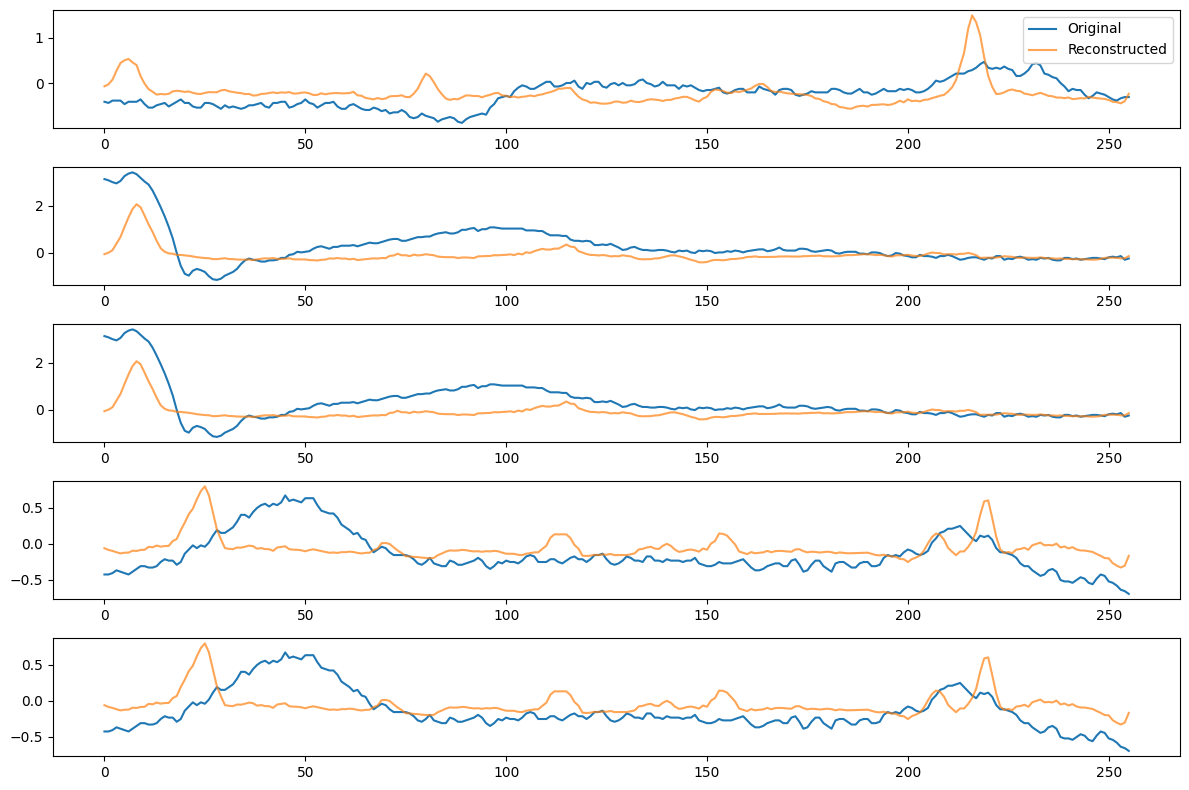

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Reconstruct test set
X_test_recon = vae.predict(X_test, verbose=0)

n_plot = 5
plt.figure(figsize=(12, 8))
for i in range(n_plot):
    idx = np.random.randint(0, len(X_test))
    plt.subplot(n_plot, 1, i + 1)
    plt.plot(X_test[idx, :, 0], label="Original")
    plt.plot(X_test_recon[idx, :, 0], label="Reconstructed", alpha=0.7)
    if i == 0:
        plt.legend()
plt.tight_layout()
plt.show()




## Generating Synthetic ECG Signals from the Latent Space

This section uses the trained **decoder** to create entirely new ECG signals by sampling random points from the latent space.

### **What the code does**

* Samples **10 random latent vectors** from a standard normal distribution.
* Passes these vectors into the **decoder** to produce synthetic ECG waveforms.
* Prints the shape of the generated samples to confirm correct output size.
* Plots **3 generated ECG signals** to visualize the model’s ability to create realistic waveforms.

This allows you to evaluate how well the VAE can generate new, synthetic ECG patterns from its learned latent representation.


Generating synthetic ECG samples...
Synthetic ECG shape: (10, 256, 1)


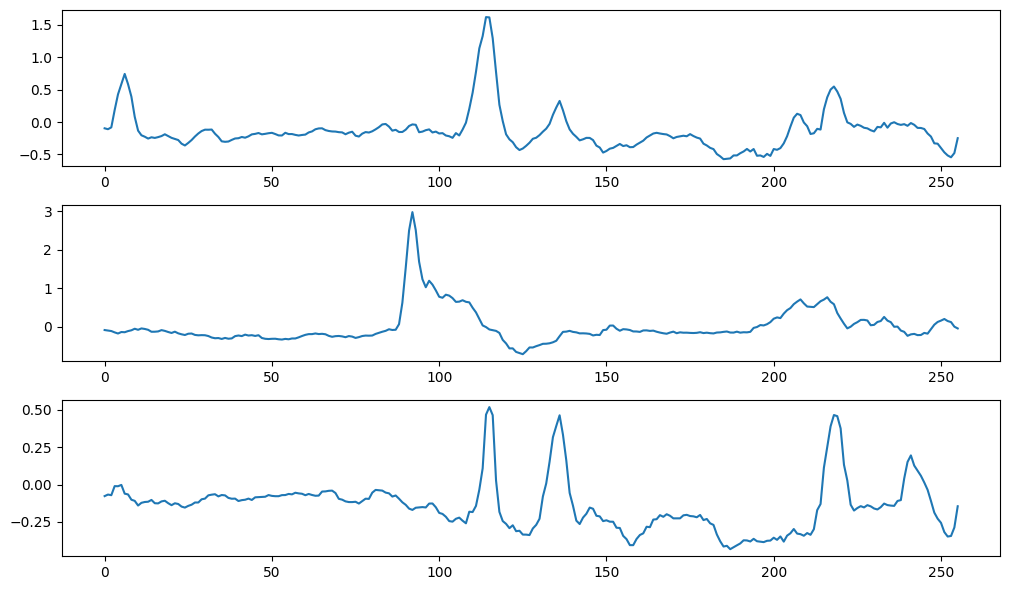

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print("Generating synthetic ECG samples...")

n_samples = 10
latent_dim = 16  # same as before

z_random = np.random.normal(size=(n_samples, latent_dim)).astype("float32")
synthetic_ecg = decoder.predict(z_random, verbose=0)

print("Synthetic ECG shape:", synthetic_ecg.shape)

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.subplot(3, 1, i + 1)
    plt.plot(synthetic_ecg[i, :, 0])
plt.tight_layout()
plt.show()




## Evaluating VAE Reconstruction Performance

This section computes quantitative error metrics and visualizes how well the VAE reconstructs ECG signals.

### **What the code does**

#### **1. Generate reconstructions**

* Runs the VAE on the test set to obtain reconstructed signals.

#### **2. Compute evaluation metrics**

* **MSE (Mean Squared Error)** – measures average squared difference.
* **RMSE (Root Mean Squared Error)** – interpretable version of MSE.
* **MAE (Mean Absolute Error)** – measures average absolute difference.

These metrics provide an objective measure of reconstruction quality.

#### **3. Visualize sample reconstructions**

* Randomly selects **3 test signals**.
* Plots:

  * The **original ECG**
  * The **reconstructed ECG** (with transparency for comparison)

This helps visually assess how well the VAE captures ECG shape and morphology.

---

This completes the quantitative and qualitative evaluation of your trained VAE model.


Starting evaluation...
Recon shape: (6, 256, 1)
Test MSE : 0.5212247967720032
Test RMSE: 0.721958999370465
Test MAE : 0.39055508375167847


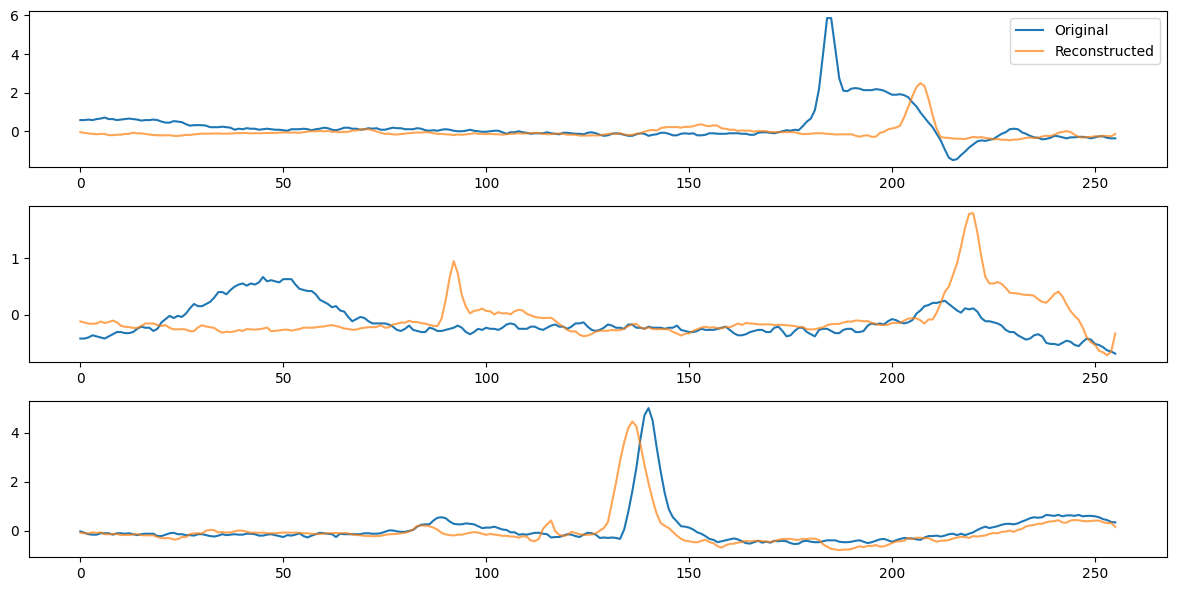

Done.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

print("Starting evaluation...")

# Forward pass to get reconstructions
X_test_recon = vae.predict(X_test, verbose=0)
print("Recon shape:", X_test_recon.shape)

# Metrics
mse = mean_squared_error(
    X_test.reshape(len(X_test), -1),
    X_test_recon.reshape(len(X_test_recon), -1),
)
mae = mean_absolute_error(
    X_test.reshape(len(X_test), -1),
    X_test_recon.reshape(len(X_test_recon), -1),
)
rmse = np.sqrt(mse)

print("Test MSE :", mse)
print("Test RMSE:", rmse)
print("Test MAE :", mae)

# Plot a few examples
n_plot = 3
plt.figure(figsize=(12, 6))
for i in range(n_plot):
    idx = np.random.randint(0, len(X_test))
    plt.subplot(n_plot, 1, i + 1)
    plt.plot(X_test[idx, :, 0], label="Original")
    plt.plot(X_test_recon[idx, :, 0], label="Reconstructed", alpha=0.7)
    if i == 0:
        plt.legend()
plt.tight_layout()
plt.show()

print("Done.")




## Evaluating VAE Reconstruction Quality

This section computes error metrics for the VAE’s reconstructed ECG signals and visualizes a few examples.

### **What the code does**

### **1. Generate Reconstructions**

* Passes the test set through the VAE to obtain reconstructed ECG segments.
* Prints the reconstruction shape to verify correct output.

### **2. Compute Error Metrics**

* **MSE** – average squared error between original and reconstructed signals.
* **RMSE** – square root of MSE, easier to interpret.
* **MAE** – average absolute error.

All metrics are computed by flattening each ECG segment for comparison.

### **3. Visualize Sample Reconstructions**

* Randomly selects **3 test examples**.
* Plots the **original** and **reconstructed** ECG signals on the same graph.
* Helps visually assess how closely the VAE matches the true waveform.

This step provides both quantitative and qualitative insight into the VAE’s reconstruction performance.


Starting evaluation...
Recon shape: (6, 256, 1)
Test MSE : 0.47980427742004395
Test RMSE: 0.6926790580204111
Test MAE : 0.3842734396457672


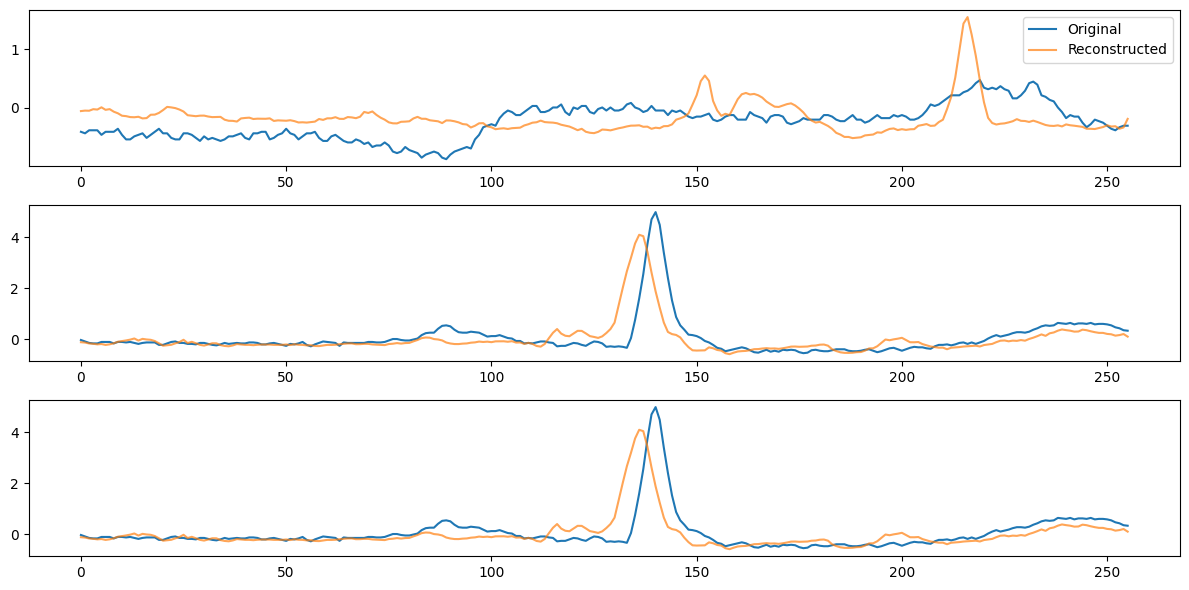

Done.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

print("Starting evaluation...")

# 1) Get reconstructions
X_test_recon = vae.predict(X_test, verbose=0)
print("Recon shape:", X_test_recon.shape)

# 2) Compute metrics
mse = mean_squared_error(
    X_test.reshape(len(X_test), -1),
    X_test_recon.reshape(len(X_test_recon), -1),
)
mae = mean_absolute_error(
    X_test.reshape(len(X_test), -1),
    X_test_recon.reshape(len(X_test_recon), -1),
)
rmse = np.sqrt(mse)

print("Test MSE :", float(mse))
print("Test RMSE:", float(rmse))
print("Test MAE :", float(mae))

# 3) Plot a few examples
n_plot = 3
plt.figure(figsize=(12, 6))
for i in range(n_plot):
    idx = np.random.randint(0, len(X_test))
    plt.subplot(n_plot, 1, i + 1)
    plt.plot(X_test[idx, :, 0], label="Original")
    plt.plot(X_test_recon[idx, :, 0], label="Reconstructed", alpha=0.7)
    if i == 0:
        plt.legend()
plt.tight_layout()
plt.show()

print("Done.")




## Generating a Batch of Synthetic ECG Samples

This section creates a large set of synthetic ECG signals by sampling random points from the model’s latent space.

### **What the code does**

* Defines the number of synthetic samples to generate (`n_synth = 200`).
* Draws **random latent vectors** from a standard normal distribution `N(0, I)` with the same latent dimension used during training.
* Passes these latent vectors through the **decoder** to produce fully synthetic ECG segments.
* Prints the shape of the generated data to confirm the output size
  → `(number_of_samples, signal_length, 1)`.

This generates a synthetic ECG dataset that can be used for augmentation, analysis, or downstream tasks.


In [ ]:
import numpy as np

# Number of synthetic samples to generate
n_synth = 200
latent_dim = 16  # same as you used when defining encoder/decoder

# Sample random latent vectors from N(0, I)
z_random = np.random.normal(size=(n_synth, latent_dim)).astype("float32")

# Decode to synthetic ECG segments
synthetic_ecg = decoder.predict(z_random, verbose=0)  # shape: (n_synth, 256, 1)
print("Synthetic ECG shape:", synthetic_ecg.shape)


Synthetic ECG shape: (200, 256, 1)




## Kolmogorov–Smirnov (KS) Test for Distribution Similarity

This section evaluates how similar the **synthetic ECG amplitudes** are to the **original ECG amplitudes** using the Kolmogorov–Smirnov (KS) test.

### **What the code does**

* Flattens both:

  * The **original test ECG signals**
  * The **synthetic ECG signals**
* Extracts all amplitude values into 1D arrays.
* Applies the **KS two-sample test**, which measures whether two distributions differ significantly.

### **KS Test Output**

* **KS statistic** → measures the maximum difference between the two cumulative distributions.
* **KS p-value** → indicates whether the difference is statistically significant.

A **higher p-value** suggests that synthetic ECG amplitudes follow a similar distribution to real ECG amplitudes.

This provides a simple statistical check on the realism of the generated signals.


In [ ]:

import numpy as np
from scipy.stats import ks_2samp

# Flatten original and synthetic amplitudes
orig_flat = X_test.reshape(len(X_test), -1)
recon_flat = X_test_recon.reshape(len(X_test_recon), -1)

orig_vals = orig_flat.flatten()
synth_flat = synthetic_ecg.reshape(len(synthetic_ecg), -1)
synth_vals = synth_flat.flatten()

# KS test: original vs synthetic amplitude distribution
ks_stat, ks_p = ks_2samp(orig_vals, synth_vals)

print("KS statistic:", float(ks_stat))
print("KS p-value  :", float(ks_p))


KS statistic: 0.1361067708333333
KS p-value  : 1.493093873689117e-24



## Comparing Original, Reconstructed, and Synthetic ECG Signals

This visualization compares three types of ECG signals side-by-side to assess model behavior:

### **What the code does**

* Sets up a grid with **5 rows**, each row showing:

  1. **Original ECG segment**
  2. **Reconstructed ECG** from the VAE
  3. **Synthetic ECG** generated from a random latent vector
* Randomly selects:

  * A test sample for the original and reconstructed plots
  * A synthetic sample from the generated dataset
* Plots all signals with clear titles and grid lines for readability.

This side-by-side comparison helps evaluate:

* How accurately the VAE reconstructs real signals
* How realistic the synthetic signals look relative to real ECG morphology

This provides a comprehensive visual understanding of model performance.


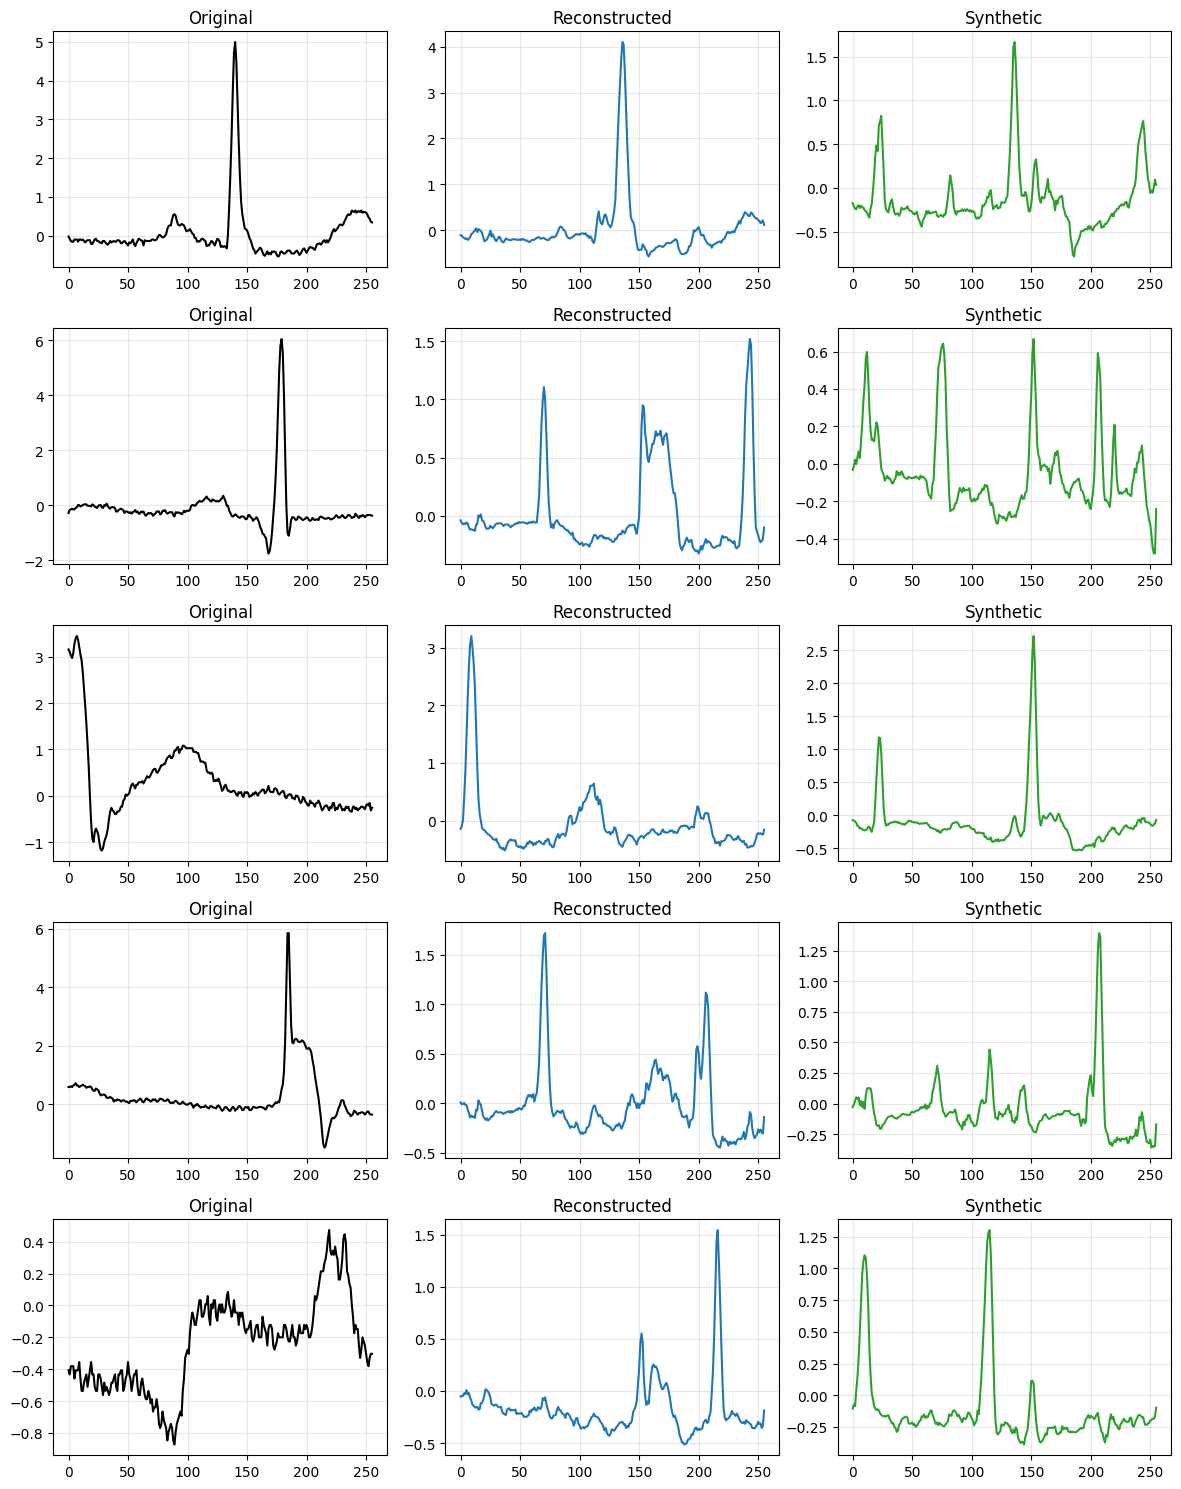

In [ ]:
import matplotlib.pyplot as plt

n_plot = 5
plt.figure(figsize=(12, 3 * n_plot))

for i in range(n_plot):
    idx = np.random.randint(0, len(X_test))
    t = np.arange(X_test.shape[1])

    # Original
    plt.subplot(n_plot, 3, 3 * i + 1)
    plt.plot(t, X_test[idx, :, 0], color="black")
    plt.title("Original")
    plt.grid(True, alpha=0.3)

    # Reconstruction
    plt.subplot(n_plot, 3, 3 * i + 2)
    plt.plot(t, X_test_recon[idx, :, 0], color="tab:blue")
    plt.title("Reconstructed")
    plt.grid(True, alpha=0.3)

    # Synthetic (random latent)
    s_idx = np.random.randint(0, len(synthetic_ecg))
    plt.subplot(n_plot, 3, 3 * i + 3)
    plt.plot(t, synthetic_ecg[s_idx, :, 0], color="tab:green")
    plt.title("Synthetic")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()




## Computing Global and Per-Segment Reconstruction Errors

This section calculates detailed error metrics to evaluate how well the VAE reconstructs each ECG segment.

### **What the code does**

### **1. Flatten Signals for Metric Calculation**

* Flattens both original and reconstructed ECG signals so they can be compared sample-by-sample.

### **2. Compute Global Metrics**

* **MSE** – average squared error across the entire test set.
* **RMSE** – square root of MSE, easier to interpret.
* **MAE** – mean absolute error across all points.

These metrics summarize overall reconstruction quality.

### **3. Compute Per-Segment MSE**

* Calculates the MSE **for each individual ECG segment** in the test set.
* Stores results in `per_seg_mse`, one value per test sample.

This allows you to analyze how reconstruction quality varies across different ECG segments.

---
This completes the error analysis for your VAE’s reconstruction performance.


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Ensure you already have X_test and X_test_recon
orig_flat = X_test.reshape(len(X_test), -1)
recon_flat = X_test_recon.reshape(len(X_test_recon), -1)

# Global metrics
mse = mean_squared_error(orig_flat, recon_flat)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(orig_flat - recon_flat))

# Per-segment MSE
per_seg_mse = np.mean((orig_flat - recon_flat) ** 2, axis=1)

print("Created per_seg_mse with shape:", per_seg_mse.shape)


Created per_seg_mse with shape: (6,)




## Summary of Numeric Evaluation Results

This section prints a complete numeric overview of the dataset and the VAE’s performance on reconstruction and synthetic signal quality.

### **1. Dataset Statistics**

* Displays the number of samples in the **train**, **validation**, and **test** sets.
* Shows the **ECG segment length** used throughout the model.

### **2. Reconstruction Metrics**

Reports how well the VAE reconstructs test ECG signals using:

* **MSE** – mean squared reconstruction error
* **RMSE** – root mean squared error
* **MAE** – mean absolute error

Also prints the **per-segment MSE distribution**, including:

* Mean
* Standard deviation
* Min and max values

This helps identify variability in reconstruction quality across individual samples.

### **3. Distribution Similarity (Original vs Synthetic)**

* Prints the **KS statistic** and **p-value** from the Kolmogorov–Smirnov test.
* These values indicate how closely the **synthetic ECG amplitudes** match the **real ECG amplitude distribution**.

---

This numeric summary provides a full quantitative picture of model performance, reconstruction accuracy, and synthetic ECG realism.


In [ ]:
import numpy as np

print("===== NUMERIC EVALUATION =====\n")

# 1) Dataset stats
print("Data:")
print("  Train samples :", len(X_train))
print("  Val samples   :", len(X_val))
print("  Test samples  :", len(X_test))
print("  Segment length:", X_train.shape[1])

# 2) Reconstruction metrics on test set
print("\nReconstruction metrics (original vs reconstruction):")
print("  MSE  :", float(mse))
print("  RMSE :", float(rmse))
print("  MAE  :", float(mae))

print("\nPer‑segment MSE distribution (test):")
print("  mean:", float(np.mean(per_seg_mse)))
print("  std :", float(np.std(per_seg_mse)))
print("  min :", float(np.min(per_seg_mse)))
print("  max :", float(np.max(per_seg_mse)))

# 3) Original vs synthetic distribution similarity
print("\nDistribution metrics (original vs synthetic amplitudes):")
print("  KS statistic:", float(ks_stat))
print("  KS p‑value  :", float(ks_p))

print("\n===== END OF NUMERIC EVALUATION =====")


===== NUMERIC EVALUATION =====

Data:
  Train samples : 19
  Val samples   : 5
  Test samples  : 6
  Segment length: 256

Reconstruction metrics (original vs reconstruction):
  MSE  : 0.47980427742004395
  RMSE : 0.6926790580204111
  MAE  : 0.3842734396457672

Per‑segment MSE distribution (test):
  mean: 0.47980427742004395
  std : 0.3313398063182831
  min : 0.09104277193546295
  max : 0.9506942629814148

Distribution metrics (original vs synthetic amplitudes):
  KS statistic: 0.1361067708333333
  KS p‑value  : 1.493093873689117e-24

===== END OF NUMERIC EVALUATION =====




## Amplitude Distribution Comparison (Original vs Synthetic)

This section compares the amplitude distributions of **real ECG signals** and **synthetic ECG signals** to evaluate how realistic the generated data is.

### **What the code does**

### **1. Prepare Amplitude Values**

* Flattens all amplitudes from the **original test ECGs**.
* Flattens all amplitudes from the **synthetic ECGs**.

### **2. Kolmogorov–Smirnov (KS) Test**

* Runs the **KS two-sample test** to measure how similar the two distributions are.
* Outputs:

  * **KS statistic** → difference between distributions
  * **KS p-value** → statistical significance of that difference

A **higher p-value** means the synthetic amplitude distribution is closer to the real one.

### **3. Plot Amplitude Histograms**

* Plots normalized histograms for:

  * Original ECG amplitudes
  * Synthetic ECG amplitudes
* Allows visual comparison of their distribution overlap.

This provides a clear statistical and visual evaluation of synthetic ECG realism.


KS statistic (orig vs synthetic): 0.1361067708333333
KS p-value                 : 1.493093873689117e-24


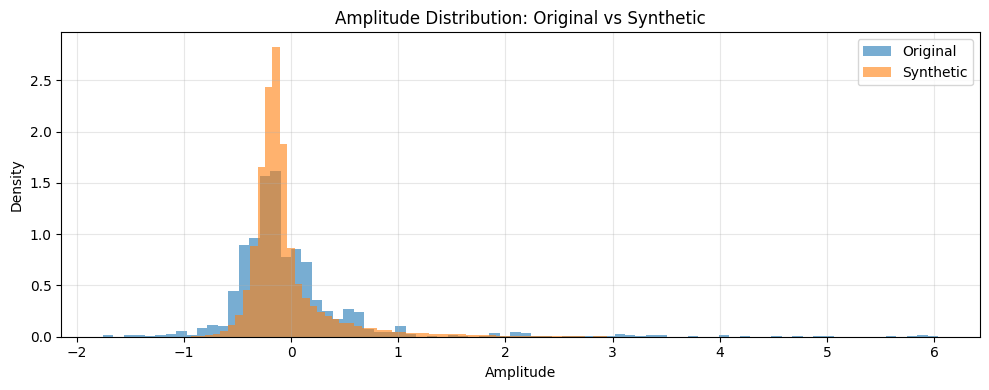

In [ ]:
from scipy.stats import ks_2samp

# Amplitude distributions
orig_vals = orig_flat.flatten()
synth_flat = synthetic_ecg.reshape(len(synthetic_ecg), -1)
synth_vals = synth_flat.flatten()

# KS test: compare distributions
ks_stat, ks_p = ks_2samp(orig_vals, synth_vals)

print("KS statistic (orig vs synthetic):", float(ks_stat))
print("KS p-value                 :", float(ks_p))

# Plot histograms
plt.figure(figsize=(10, 4))
plt.hist(orig_vals, bins=80, density=True, alpha=0.6, label="Original")
plt.hist(synth_vals, bins=80, density=True, alpha=0.6, label="Synthetic")
plt.xlabel("Amplitude")
plt.ylabel("Density")
plt.title("Amplitude Distribution: Original vs Synthetic")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



##  Per-Segment Reconstruction Error (MSE)

This block evaluates how well the model reconstructs each ECG segment individually.

### **What the code computes**

1. **Per-segment MSE**

   * For every ECG segment in the test set:
     [
     \text{MSE}*i = \frac{1}{N}\sum*{t=1}^N (x_{i,t} - \hat{x}_{i,t})^2
     ]
   * This provides a fine-grained view of reconstruction quality, instead of only a global average.

2. **Summary Statistics**

   * **Mean** – typical reconstruction error
   * **Std** – variability in reconstruction quality across segments
   * **Min/Max** – best and worst reconstructed segments

3. **Histogram Visualization**

   * Plots the distribution of segment-wise MSE values.
   * A good model should have:

     * MSE values clustered toward **low**.
     * A narrow distribution (low std).

### **Why this is useful**

* Helps identify whether reconstructions are **consistently good** or vary a lot.
* Detects problematic or outlier segments.
* Provides a quantitative measure of how well the latent space captures ECG morphology.



Per-segment MSE:
  mean : 0.47980427742004395
  std  : 0.3313398063182831
  min  : 0.09104277193546295
  max  : 0.9506942629814148


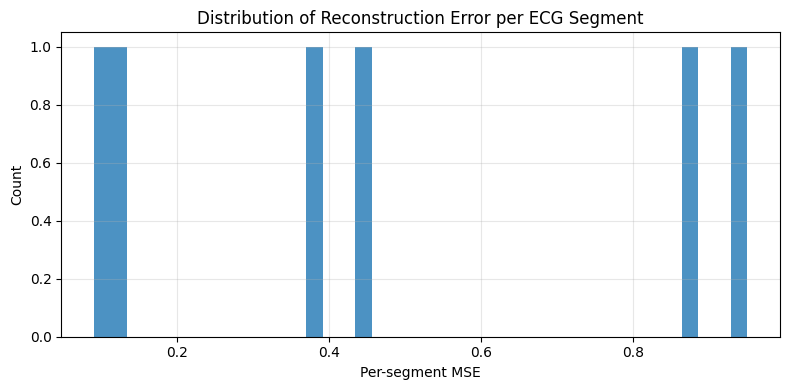

In [ ]:
# Per-segment MSE between original and reconstruction
per_seg_mse = np.mean((orig_flat - recon_flat) ** 2, axis=1)

print("Per-segment MSE:")
print("  mean :", float(np.mean(per_seg_mse)))
print("  std  :", float(np.std(per_seg_mse)))
print("  min  :", float(np.min(per_seg_mse)))
print("  max  :", float(np.max(per_seg_mse)))

plt.figure(figsize=(8, 4))
plt.hist(per_seg_mse, bins=40, alpha=0.8, color="tab:blue")
plt.xlabel("Per-segment MSE")
plt.ylabel("Count")
plt.title("Distribution of Reconstruction Error per ECG Segment")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Saving Trained Model and Generated Results

This code creates a directory to store all important experiment artifacts and then saves:

* the trained **VAE model**
* the original **train/validation/test datasets**
* the **reconstructed test signals**
* the **synthetic ECG signals** generated by the decoder
* the **per-segment MSE** reconstruction errors

Finally, it prints the directory contents to confirm that all files were successfully saved.


In [ ]:
import os
import numpy as np

out_dir = "/content/ecg_vae_results"
os.makedirs(out_dir, exist_ok=True)

# Model
vae.save(os.path.join(out_dir, "ecg_vae_model.keras"))

# Arrays
np.save(os.path.join(out_dir, "X_train.npy"), X_train)
np.save(os.path.join(out_dir, "X_val.npy"),   X_val)
np.save(os.path.join(out_dir, "X_test.npy"),  X_test)
np.save(os.path.join(out_dir, "X_test_recon.npy"), X_test_recon)
np.save(os.path.join(out_dir, "synthetic_ecg.npy"), synthetic_ecg)
np.save(os.path.join(out_dir, "per_segment_mse.npy"), per_seg_mse)

print("Saved artifacts in:", out_dir)
print("Files:", os.listdir(out_dir))


Saved artifacts in: /content/ecg_vae_results
Files: ['X_train.npy', 'X_test_recon.npy', 'X_test.npy', 'X_val.npy', 'per_segment_mse.npy', 'summary.json', 'synthetic_ecg.npy', 'ecg_vae_model.keras']
